In [1]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
import matplotlib.pyplot as plt
import numpy as np
import dplm_base

import time




In [2]:
dplm_instance = dplm_base.dplm('para1.csv')
dplm_instance.show_dplm_config()
dplm_instance.set_dplm_slot_num(10)
dplm_instance.set_dplm_spring_num(3)
dplm_instance.set_dplm_allowed_angle_range(-20, 60, 1)

dplm_instance.set_dplm_spring_constants([400,300,200])
dplm_instance.set_dplm_spring_lengths([0.2, 0.15, 0.1])

# dplm_instance.calculate_current_moment
# dplm_instance.set_slot([-6, 18, 0])
# moment_weight, moment_spring_list, moment_total = dplm_instance.calculate_current_moment()
# lower_limit, upper_limit, step_size, total_angle_num = dplm_instance.get_allowed_angle_range().values()
# 26 32 38
#13 37 38

Column names are linkage, length, mass
alpha_o1o_1:0
alpha_o2o4:0
alpha_o2o_2:0
alpha_o3o_3:0
alpha_o4o_4:0
alpha_o_1o_2:0
l_o1o2:0.254
l_o1o3:0.10699999999999998
l_o1o_1:0.762
l_o2o4:0.615
l_o2o_2:0.762
l_o3o4:0.254
l_o3o_3:0.648
l_o4o_4:0.648
l_o_1o_2:0.254
l_o_3o_4:0.254
m_o1o2:0.29870661
m_o1o_1:0.84734661
m_o2o4:0.67904403
m_o2o_2:0.84734661
m_o3o_3:0.72422661
m_o4o_4:0.72422661
m_o_1o_2:0.29870661
r_o1o_1:0.381
r_o2o4:0.3075
r_o2o_2:0.381
r_o3o_3:0.324
r_o4o_4:0.324
r_o_1o_2:0.127
The number of slots is set to 10


In [ ]:
import numpy as np
%matplotlib inline

install_position_step = 1e-2
spring_constant_step = 1e1
spring_length_step = 1e-2


def f(X):
    dplm_instance.set_springs_positions(np.array([X[0],X[1],X[2]])*install_position_step)
    dplm_instance.set_dplm_spring_lengths(np.array([X[3],X[4],X[5]])*spring_length_step)
    dplm_instance.set_dplm_spring_constants(np.array([X[6],X[7],X[8]])*spring_constant_step)
    return dplm_instance.current_rmse(False)

varbound=np.array([[-0.4/install_position_step,0.4/install_position_step]]*3+ [[0.1/spring_length_step,0.3/spring_length_step]]*3+ [[200/spring_constant_step, 400/spring_constant_step]]*3)
varbound = varbound.astype(int)

model=ga(function=f,dimension=9,variable_type='int',variable_boundaries=varbound)


start = time.time()
print("Timer starts at {}".format(start))
model.run()
end = time.time()
print('timer ends at {}'.format(end))
print('time elapsed: {}'.format(end - start))

Timer starts at 1617874531.7757185
|||_______________________________________________ 6.8% GA is running...

Timer starts at 1617955144.213109
 The best solution found:
 [0. 0. 8.]

 Objective function:
 1.1145189010560386


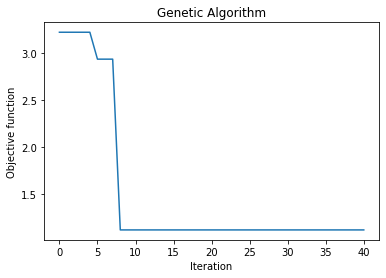


time elapsed: 37.26339268684387
{'variable': array([0., 0., 8.]), 'function': 1.1145189010560386}


In [3]:
import numpy as np
def f2(X):
    dplm_instance.set_slot(X)
    return dplm_instance.current_rmse()

varbound2=np.array([[-9, 9]]*3)

aps={'max_num_iteration': None,\
                'population_size':100,\
                'mutation_probability':0.2,\
                'elit_ratio': 0.01,\
                'crossover_probability': 0.5,\
                'parents_portion': 0.3,\
                'crossover_type':'uniform',\
                'max_iteration_without_improv':30}

    
    
model2 = ga(function=f2,dimension=3,variable_type='int',variable_boundaries=varbound2, algorithm_parameters=aps )

start = time.time()
print("Timer starts at {}".format(start))
model2.run()
end = time.time()
print('timer ends at {}'.format(end))
print('time elapsed: {}'.format(end - start))

print(model2.output_dict)

In [30]:
dplm_instance.set_dplm_spring_constants([210,370,240])
dplm_instance.set_dplm_spring_lengths([.21, .20, .34])
dplm_instance.set_springs_positions([.39, .40, -.01])
# dplm_instance.set_slot([-0.03184762, -0.09006709,  8.31186673])
# [ 4. 40.  4. 10. 10. 10. 40. 33. 40.]
# [38. 40.  9. 21. 20. 31. 20. 39. 25.]
#[39., 40., -1., 21., 20., 34., 21., 37., 24.]
#  [ 4.17019967  4.11513749 39.99470074 10.00432132 10.01856989 10.00480628
#  39.99833592 39.99973714 32.87578594]

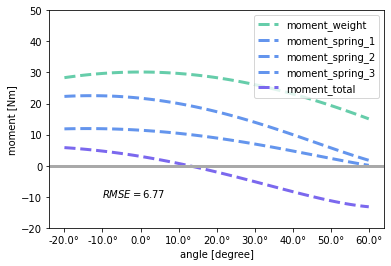

In [31]:
a,b,c,rmse= dplm_instance.calculate_current_moment()
lower_limit, upper_limit, step_size, total_angle_num = dplm_instance.get_allowed_angle_range().values()
%matplotlib inline
plt.cla()    
plt.plot(range(lower_limit, upper_limit+1), a, label = 'moment_weight', ls = '--', lw = 3, color = 'mediumaquamarine')

ax = plt.gca()

for i in range(len(b)):
    plt.plot(range(lower_limit,upper_limit+1), b[i], label = 'moment_spring_{}'.format(i+1), ls = '--', lw = 3, color = 'cornflowerblue')

plt.plot(range(lower_limit, upper_limit+1), c, label = 'moment_total', ls = '--', lw = 3, color = 'mediumslateblue')
plt.axhline(y = 0, ls = '-', lw = 3, color = 'darkgrey')

plt.axis(ymin=-20, ymax=50)
plt.legend()
plt.xlabel('angle [degree]')
plt.ylabel('moment [Nm]')
ax.xaxis.set_major_formatter('{x}°')


plt.text(-10,-10, r'$RMSE={:.2f}$'.format(rmse))

plt.savefig('anything.png')
plt.show()


In [ ]:
import numpy as np

install_position_step = 1e-3
spring_constant_step = 1e1
spring_length_step = 1e-3


def f(X):
    dplm_instance.set_springs_positions(np.array([X[0],X[1],X[2]])*install_position_step)
    dplm_instance.set_dplm_spring_lengths(np.array([X[3],X[4],X[5]])*spring_length_step)
    dplm_instance.set_dplm_spring_constants(np.array([X[6],X[7],X[8]])*spring_constant_step)
    return dplm_instance.current_rmse()
    
    
varbound=np.array([[-0.4/install_position_step,0.4/install_position_step]]*3+ [[0.1/spring_length_step,0.3/spring_length_step]]*3+ [[200/spring_constant_step, 400/spring_constant_step]]*3)

print(varbound.astype(int))